# COGS 108 - Data Checkpoint

# Names

- Jiaying Chen 
- Gaurav Nair
- Esther Tae
- Santiago Cardenas Rey
- Qirui Zheng

# Research Question

How does the preference of the users on Epinion change over time on the products? Are their sentiments affected by the nation's economy at the time or smaller influences such as item price?

## Background and Prior Work

Amidst a society that spends a significant amount of their life online, everyone has scoured the internet for reviews of a product at least once. Products of furniture, makeup, skincare, and technology are just a few. And oftentimes, reading the descriptions of them mean almost nothing– they feel too robotic or professional for people to feel truthful, especially since the persons who wrote those descriptions are often aiming for profit rather than truth. As a result, user rating and comments are often the most important part of a product page for consumers. The situation of the economy at certain points in time may also be a factor that affects sentiments. Discovering if there is a correlation can reveal more about how people rate and review products and exactly what they pay attention to. 

Some prior work has already been done regarding general user comments and ratings. One study focused on Amazon, a website known for being a reliable online shopping source. Focusing on emotionality and product star rating, the paper tested the relationship between ratings and review length and text sentiments, although they also took into account the type of product featured.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) The results revealed negative sentiments were more influential to the star ratings compared to positive sentiments of the same magnitude, as negative experiences were recollected more readily and given more weight<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), which is a revelation we will be looking out for in our project. Another study focused on the sentiment and the rating of users, as well as the adjectives used when they correlated. This was done to help future researchers find out if it could make customers more prone to write reviews if they let the customer choose between adjectives rather than write an entire review.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This study concluded a moderate correlation between user rating and reviews, which indicated a method to simplify online reviews and customers do not necessarily motivate the rating in their comment and many times actually write out objective lists (i.e. pros and cons).<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) It also revealed how longer comments tended to have a slightly stronger correlation<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), which was similar to the first study where they found the product star ratings of a review were negatively related to the length of a review.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Both studies also discussed the existence of negativity bias, as the longer comments tended to be negative instead of positive due to negative experiences being recalled more vividly due to the weight of them on the user. These are all explorations we will be taking into consideration for the project in regards to user comments and ratings. Although these works do not discuss the effect of time, we will expand upon them by studying it in our project.  


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Ramachandran, R., Sudhir, S., & Unnithan, A. B. (2021). Exploring the relationship between emotionality and product star ratings in online reviews. IIMB Management Review. https://doi.org/10.1016/j.iimb.2021.12.002  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Sandström, E., & Josefsson, F. (n.d.). Exploring the Correlation Between Ratings, Adjectives and Sentiment on Customer Reviews. Retrieved February 7, 2025, from https://www.diva-portal.org/smash/get/diva2:1691596/FULLTEXT01.pdf 

# Hypothesis


We predict that as time passes and prices adjust in response to economic factors, user sentiment (reflected in ratings and comments) will be closely tied to whether consumers perceive the price paid as fair. If users believe the cost aligns with the value received, they will respond with higher ratings and more positive sentiment; if not, their sentiment and ratings will be more negative. 

We also predict that the sentiment of the comments of the users are impacted by the economy itself. We will be using the Real GDP Growth as a measurement tool to measure inflation and economic impacts on consumer behavior.

# Data

## Data overview
- The ideal dataset to answer our research question would be a dataset with the time of user comments, costs of the items, and rating from users. The ideal number of observations would be at least ten thousand entries in order to have a proper representation to study. The variables would be: the star rating, time (used as time series), and description to draw sentiment generalizations. The data would be collected from the website data itself, and will be stored and organized in a CSV dataframe. 
- We are also using the real GDP data of the US as a possible factor that can influence the user sentiments to test our hypothesis about the correlation between user sentiment and economic factors, since we hypothesized that the Real GDP is positively correlated with consumer sentiment.
 
- Dataset #1
  - Dataset Name: `epinion`
  - Link to the dataset: [Social Recommendation Data-Epinion](https://cseweb.ucsd.edu/~jmcauley/datasets.html#social_data)
  - Number of observations: **200853** rows
  - Number of variables: **6** 
  
- Dataset #2 (if you have more than one!)
  - Dataset Name: `real_gdp`
  - Link to the dataset: [Real Gross Domestic Product (A191RL1Q225SBEA)](https://fred.stlouisfed.org/series/A191RL1Q225SBEA)
  - Number of observations: **311** rows
  - Number of variables: **2**

### Epinion dataset 
| Variable  | Data Type | Description |
| -------- | ------- | ------ |
| `item`   | `string`| Specific item entry.  |
| `user` | `string`| The epinions username that bought the item. |
| `paid`  | `float64`| The amount the user paid. |
| `time` | `float64`| The timestamp that the user published their rating for the item, in [unix timestamp](https://en.wikipedia.org/wiki/Unix_time) format. |
| `stars`  | `float`| The star rating user gave on the item. |
| `words` |  `string`| User comments on the item. |

### GDP dataset
- Real GDP measures the total value of all goods and services produced in the country, adjusted for inflation. It is typically reported on a seasonally adjusted annual rate (SAAR) basis and in chained 2017 dollars to reflect real economic growth.
The data is published quarterly by the BEA and widely used for economic analysis.
- GDP is measured in the currency of the country in question. 

| Variable  | Data Type | Description |
| -------- | ------- | ------ |
| `Observation-date`   | `string`| The date that the observation is recorded. This column has been renamed to `Quarter` after data cleaning, since observations are done quarterly.  |
| `A191RL1Q225SBEA` | `string`| The change in GDP of the specified quarter. A negative value implies a contraction in economy, while a positive value implies growth compared to previous quarter. This column has been renamed to `Real_GDP` after data cleaning.|


### How we intend to use them
We will utilize various methods such as linear regressions or logarithmic regression to identify possible correlations between the change in GDP and user sentiment.

## Set up and imports 

In [6]:
# run !pip install transformers 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transformers
from transformers import pipeline

## Epinion Dataset

In [7]:
epinion = pd.read_csv('epinion.csv')
epinion.head()


,item,user,paid,time,stars,words
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...


### Data cleaning

In [8]:
# Fill all NAN values in words to avoid errors  
epinion['words'] = epinion['words'].fillna("").astype(str)


### Data processing: Sentimental analysis

In [ ]:
# Load a pre-trained Hugging Face sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=6)

# Define the classification functionI
def classify_sentiment(text):
    if not text.strip():  # Handle empty strings
        return "neutral"  # Or any default label
    result = sentiment_model(text[:512])  # Truncate to 512 tokens
    return result[0]['label']  # Extract the sentiment label

# Apply the function to classify all reviews
epinion['sentiment'] = epinion['words'].apply(classify_sentiment)

# Display the results
print(epinion[['words', 'sentiment']].head())

epinion['sentiment'] = epinion['sentiment'].apply(lambda x: int(x[0]) if x != 'neutral' else 2.5)

epinion.to_csv('data_with_sentiment.csv', index=False)
epinion.head()

The code above uses a sentimental analysis model to find the sentiment of the comments of the users. The code takes significant amount of time and requires GPU to run, thus we will import the `data_with_sentiment.csv` output and directly use it here. The actual ran code is attached in `qirui_sentiment_bert.ipynb`. 

In [9]:
epinion = pd.read_csv('data_with_sentiment.csv')
epinion.head()

,item,user,paid,time,stars,words,sentiment
0,Minolta_QMS_PagePro_1250E_Printers,fgb59h,260.0,1.027296e+09,4.0,i got this printer from minolta as a warranty ...,3.0
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,bucho_ky,1800.0,1.201306e+09,2.0,although i love my vaio especially the gorgeou...,3.0
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,redp944,1000.0,1.118016e+09,4.0,this is my first laptop and i bought it about ...,5.0
3,pr-Durabrand_CD-85_Personal_CD_Player,spongebag7,20.0,1.149293e+09,4.0,just recently my sony dej001 walkman died on m...,2.0
4,pr-Sony_KV_36FS12__Standard_Televisions,pyros7,1199.0,1.012262e+09,5.0,well when i graduated from college it didnt ta...,3.0


In [10]:
epinion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       200853 non-null  object 
 1   user       200852 non-null  object 
 2   paid       189148 non-null  float64
 3   time       189083 non-null  float64
 4   stars      189083 non-null  float64
 5   words      184106 non-null  object 
 6   sentiment  200853 non-null  float64
dtypes: float64(4), object(3)
memory usage: 10.7+ MB


In [11]:
# Drop all unecessary columsn and drop all entries with null values. 
epinion = epinion[['item', 'paid', 'time', 'stars', 'sentiment']].dropna()

In [12]:
epinion.shape[0]/200853
# 94% of the data is still intact. We are good to go! 

0.9413999293015289

In [13]:
#visualize date time to see the date makes sense 
epinion['time'] = pd.to_datetime(epinion['time'], unit='s')
epinion['time'].describe()

count                           189083
mean     2005-08-28 22:34:41.790536320
min                2001-01-17 00:00:00
25%                2003-04-09 00:00:00
50%                2005-06-16 00:00:00
75%                2007-09-18 00:00:00
max                2013-11-15 00:00:00
Name: time, dtype: object

In [14]:
epinion['date'] = epinion['time'].dt.to_period('Q').dt.start_time
epinion = epinion.drop(columns=['time'])
epinion.head()

,item,paid,stars,sentiment,date
0,Minolta_QMS_PagePro_1250E_Printers,260.0,4.0,3.0,2002-07-01
1,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800.0,2.0,3.0,2008-01-01
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1000.0,4.0,5.0,2005-04-01
3,pr-Durabrand_CD-85_Personal_CD_Player,20.0,4.0,2.0,2006-04-01
4,pr-Sony_KV_36FS12__Standard_Televisions,1199.0,5.0,3.0,2002-01-01


<Axes: xlabel='sentiment'>

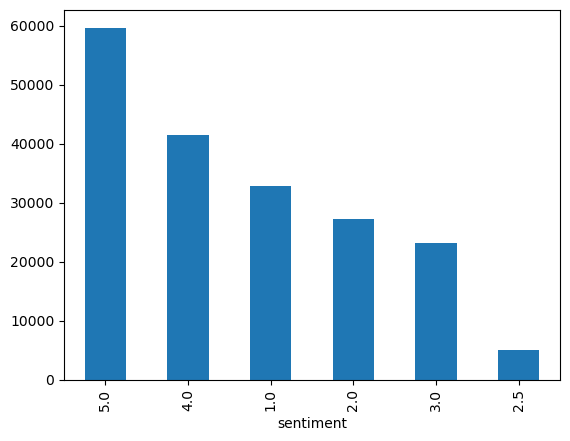

In [15]:
epinion['sentiment'].value_counts().plot(kind='bar')

## Real GDP Dataset

In [16]:
real_gdp =  pd.read_csv('A191RL1Q225SBEA.csv')
real_gdp = real_gdp.rename(columns={'observation_date': 'Quarter', 'A191RL1Q225SBEA': 'Real_GDP'})
real_gdp

,Quarter,Real_GDP
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8
...,...,...
306,2023-10-01,3.2
307,2024-01-01,1.6
308,2024-04-01,3.0
309,2024-07-01,3.1


In [17]:
real_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   311 non-null    object 
 1   Real_GDP  311 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


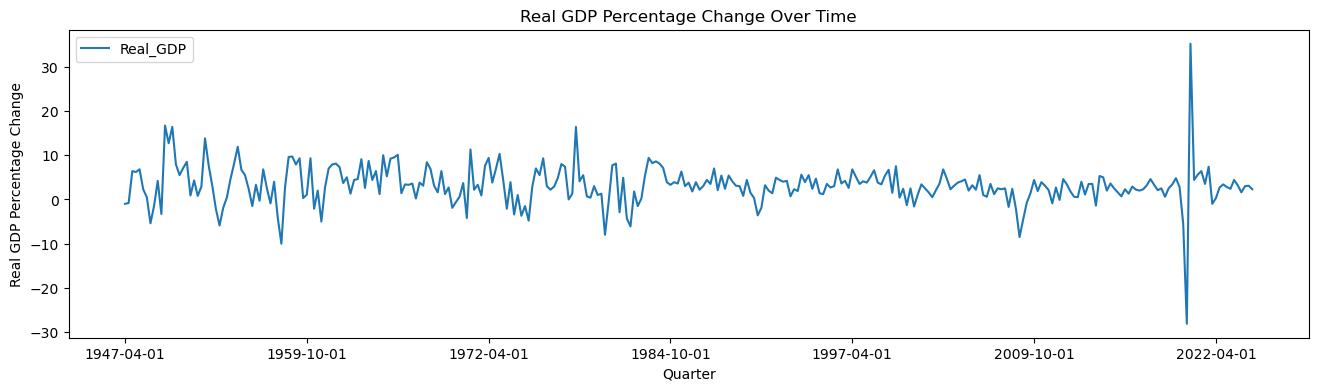

In [18]:
real_gdp.plot(kind='line', x='Quarter', y='Real_GDP', figsize=(16, 4))  # Set figsize here
plt.xlabel('Quarter')
plt.ylabel('Real GDP Percentage Change')
plt.title('Real GDP Percentage Change Over Time')
plt.show()

# Ethics & Privacy

Our team consulted [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist) as suggested by the proposal guide. Here are some questions we have looked into: 

- Are there any biases/privacy/terms of use issues with the data you proposed?

There may be privacy concerns with Personally Identifiable Information, since the data contains usernames which could potentially identify individuals. It is crucial to consider whether the data has been properly anonymized to prevent re-identification.


- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)

The dataset may have selection bias where certain user demographics may be overrepresented, such as those who are more likely to leave reviews (e.g., dissatisfied customers AND very satisfied customers are more likely to leave reviews). There may also be a small amount of response bias, for the users may leave reviews due to personal experiences unrelated to the product itself. 


- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?

Exploratory data analysis is a good way to detect the biases. When analyzing data, we can see the temporal trend and how extreme the ratings are to make inferences about why the users leave their reviews. In terms of how the data was collected, we know it is real, authentic data provided by the epinion website itself.  


- How will you handle issues you identified?

To handle the issue of anonymity, we will take away the username column when doing our analysis since it provides no useful information. To handle bias, we will check and see whether or not the ratings really are as extreme as we hypothesized it to be, and we can make inferences carefully and accordingly. We will make reasonable data visualizations to understand the data more, and we will use statistical methods to see if correlations exist in our data. 

# Team Expectations 

* Have access to the master document with team meetings and base information to keep track of everything. 
* Attend the meeting at the set time, or inform the group if you cannot make it.
* If anyone has questions, teammates will respond and answer. 
* Finish discussed tasks on time, usually by the next meeting date.
* Allow good and kind communication.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/17  |  5 PM | Download data set, review project instructions and previous projects  | Decide on previous project to review and discuss data set |
| 1/24  |  5 PM | Explore data set further  | Review previous project form (Santiago), decide on research question |
| 1/31  |  5 PM | Read the COGS 108 Team Policies and the Project Proposal documents, previous project review completed  | Work on the project proposal and delegate specific sections | 
| 2/07  |  5 PM | Finalize individual tasks and complete the project proposal | Review the project proposal and ensure everything is up to quality and approved by everyone | 
| 2/14  | 5 PM  | Edit, finalize, and submit proposal | Discuss data and EDA  |
| 2/21  | 5 PM  | Finalized Data checkpoint; discussed responsibility for EDA | Prepare EDA document for next meeting  |
| 2/28  | 5 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 3/07  | 5 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 3/19  | Before 11:59 PM  | Review project and ensure everything is up to quality | Turn in Final Project & Group Project Surveys |